We aim to analyze the GradeClass based on the supplied variables in the dataset using PCA.

In [1]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install numpy

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

student_data = pd.read_csv('student_data.csv')

In [3]:
y = student_data['GradeClass']
X = student_data.drop(columns=['GPA', 'GradeClass', 'StudentID'])

scaler = StandardScaler()
x = scaler.fit_transform(X)
pca = PCA(n_components=None)
pca.fit(x)

components = pca.components_
explained_variance = pca.explained_variance_ratio_

pca_df = pd.DataFrame(pca.components_, columns=X.columns)

In [6]:
top_3_pcs = pca_df.head(3)
top_3_explained_variance = explained_variance[:3]

top_3_pcs_with_variance = pd.DataFrame(top_3_pcs)
top_3_pcs_with_variance['Explained Variance'] = top_3_explained_variance

importance_scores = top_3_pcs.abs().sum(axis=0)
most_important_variables = importance_scores.nlargest(3)

print(most_important_variables)

Sports               0.980210
ParentalEducation    0.903771
Absences             0.876216
dtype: float64


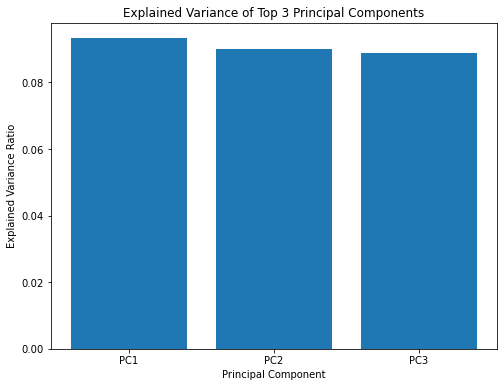

In [7]:
# Explained Variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, 4), top_3_explained_variance, tick_label=['PC1', 'PC2', 'PC3'])
plt.title('Explained Variance of Top 3 Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

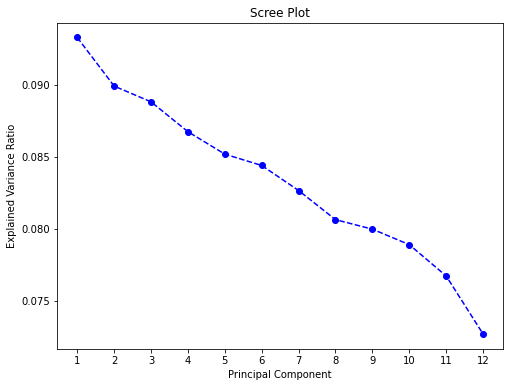

In [8]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))
plt.show()

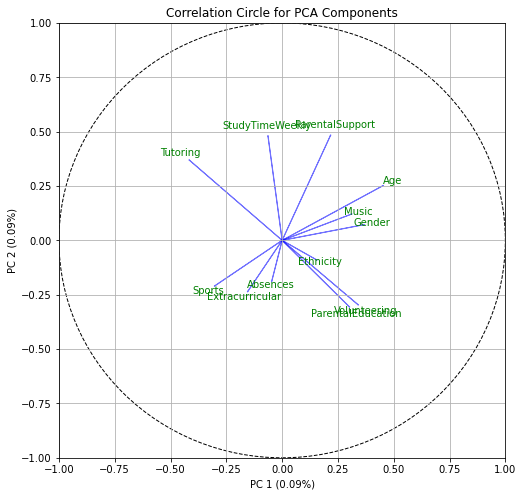

In [9]:
# Correlation Circle
def plot_correlation_circle(pca, X, component_1=0, component_2=1):
    pcs = pca.components_
    n = len(pcs[0])
    
    # Create the circle
    fig, ax = plt.subplots(figsize=(8, 8))
    circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
    ax.add_artist(circle)

    # Plot each variable's vector
    for i in range(n):
        plt.arrow(0, 0, pcs[component_1, i], pcs[component_2, i], color='b', alpha=0.5)
        plt.text(pcs[component_1, i] * 1.1, pcs[component_2, i] * 1.1, X.columns[i], color='g', ha='center', va='center')

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel(f'PC {component_1+1} ({pca.explained_variance_ratio_[component_1]:.2f}%)')
    plt.ylabel(f'PC {component_2+1} ({pca.explained_variance_ratio_[component_2]:.2f}%)')
    plt.grid()
    plt.title('Correlation Circle for PCA Components')
    plt.show()

plot_correlation_circle(pca, X, component_1=0, component_2=1)